# Esercitazione 6: Ising 1D


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.optimize as opt


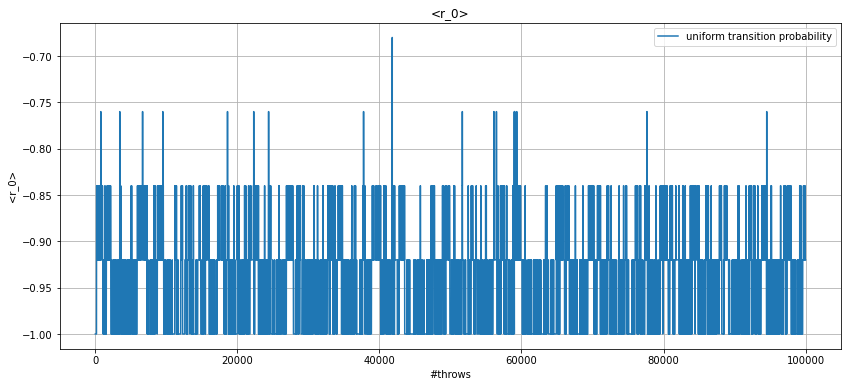

In [68]:
file=open('Equilib.ene')
E=np.loadtxt(file)
x=np.linspace(1,len(E),len(E))

plt.figure(figsize=(14,6))
plt.plot(x,E,label='uniform transition probability')
plt.legend()
plt.xlabel('#throws')
plt.ylabel('<r_0>')
plt.title('<r_0>')
#plt.axhline(-0.46187, color='r')
plt.grid(True)
plt.show()

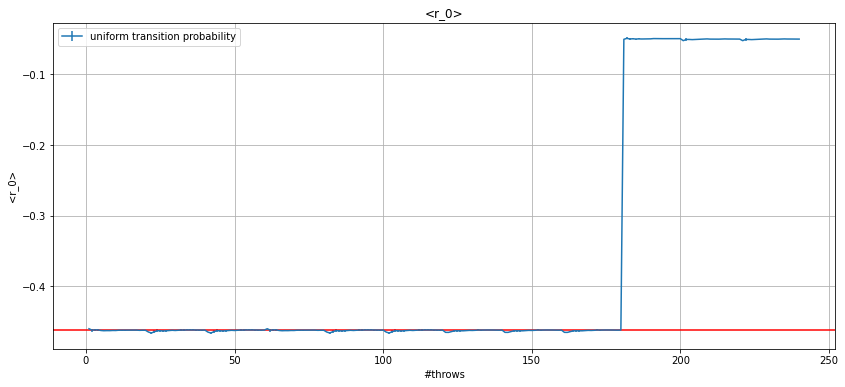

In [17]:
file=open('output.ene.0')
E,err_E=np.loadtxt(file, delimiter=",", usecols=[2,3], unpack=True)
x=np.linspace(1,len(E),len(E))

plt.figure(figsize=(14,6))
plt.errorbar(x,E,yerr=err_E,label='uniform transition probability')
plt.legend()
plt.xlabel('#throws')
plt.ylabel('<r_0>')
plt.title('<r_0>')
plt.axhline(-0.46187, color='r')
plt.grid(True)
plt.show()

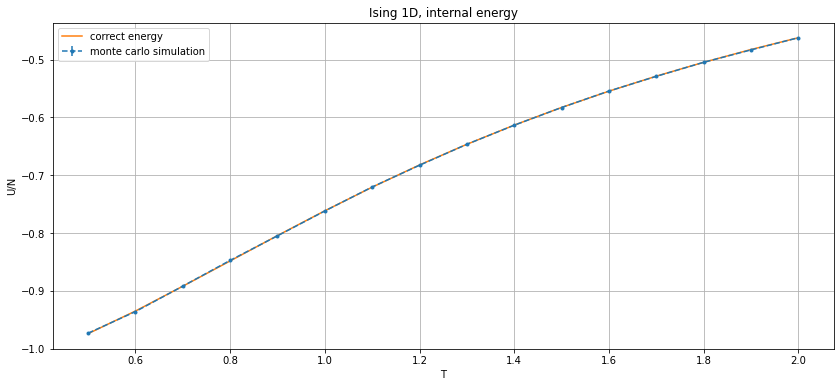

In [97]:
file=open('E_final.dat')
T,E,err_E=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)

points=100
#T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )


plt.figure(figsize=(14,6))
plt.errorbar(T,E,yerr=err_E,fmt='.--', label='monte carlo simulation')
plt.plot(T, e, label='correct energy')
plt.legend()
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
#plt.ylim(-0.9,-0.88)
plt.grid(True)
plt.show()

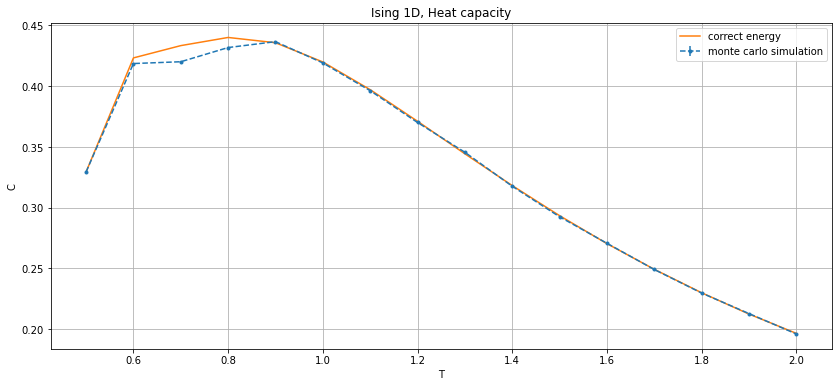

In [98]:
file=open('Heat_final.dat')
T,C,err_C=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)


heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

plt.figure(figsize=(14,6))
plt.errorbar(T,C*50,yerr=err_C,fmt='.--', label='monte carlo simulation')
plt.plot(T, heat, label='correct energy')
plt.legend()
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
#plt.ylim(-0.9,-0.88)
plt.grid(True)
plt.show()

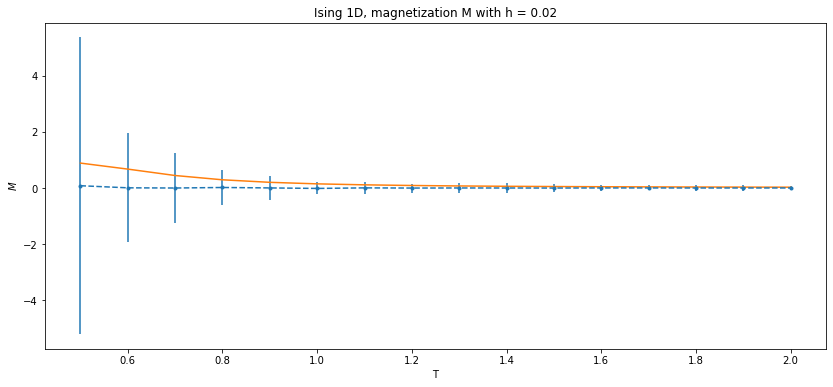

In [99]:
file=open('M_final.dat')
T,M,err_M=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)



h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
m = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

plt.figure(figsize=(14,6))
plt.errorbar(T,M/50,yerr=err_M,fmt='.--', label='monte carlo simulation')
plt.plot(T, m)
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.show()

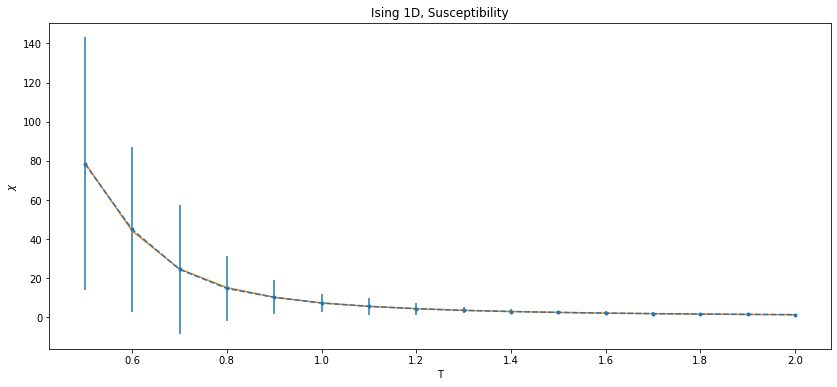

In [100]:
file=open('X_final.dat')
T,X,err_X=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)


x = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

plt.figure(figsize=(14,6))
plt.errorbar(T,X/50,yerr=err_X,fmt='.--', label='monte carlo simulation')
plt.plot(T, x)
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.show()